In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

FILTERING

In [12]:
dados_originais = pd.read_csv('cancer.csv')
dados_originais.drop(columns={'id','Unnamed: 32'},axis=1,inplace=True)
dados_originais.dropna()
dados_originais['diagnosis'] = dados_originais['diagnosis'].replace('B',0,regex=True)
dados_originais['diagnosis'] = dados_originais['diagnosis'].replace('M',1,regex=True)
dados_originais['diagnosis'] = dados_originais['diagnosis'].astype(int)

DATAINFO

In [13]:
#dados_originais.info()
#dados_originais.shape
#dados_originais.describe()
dados_originais.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


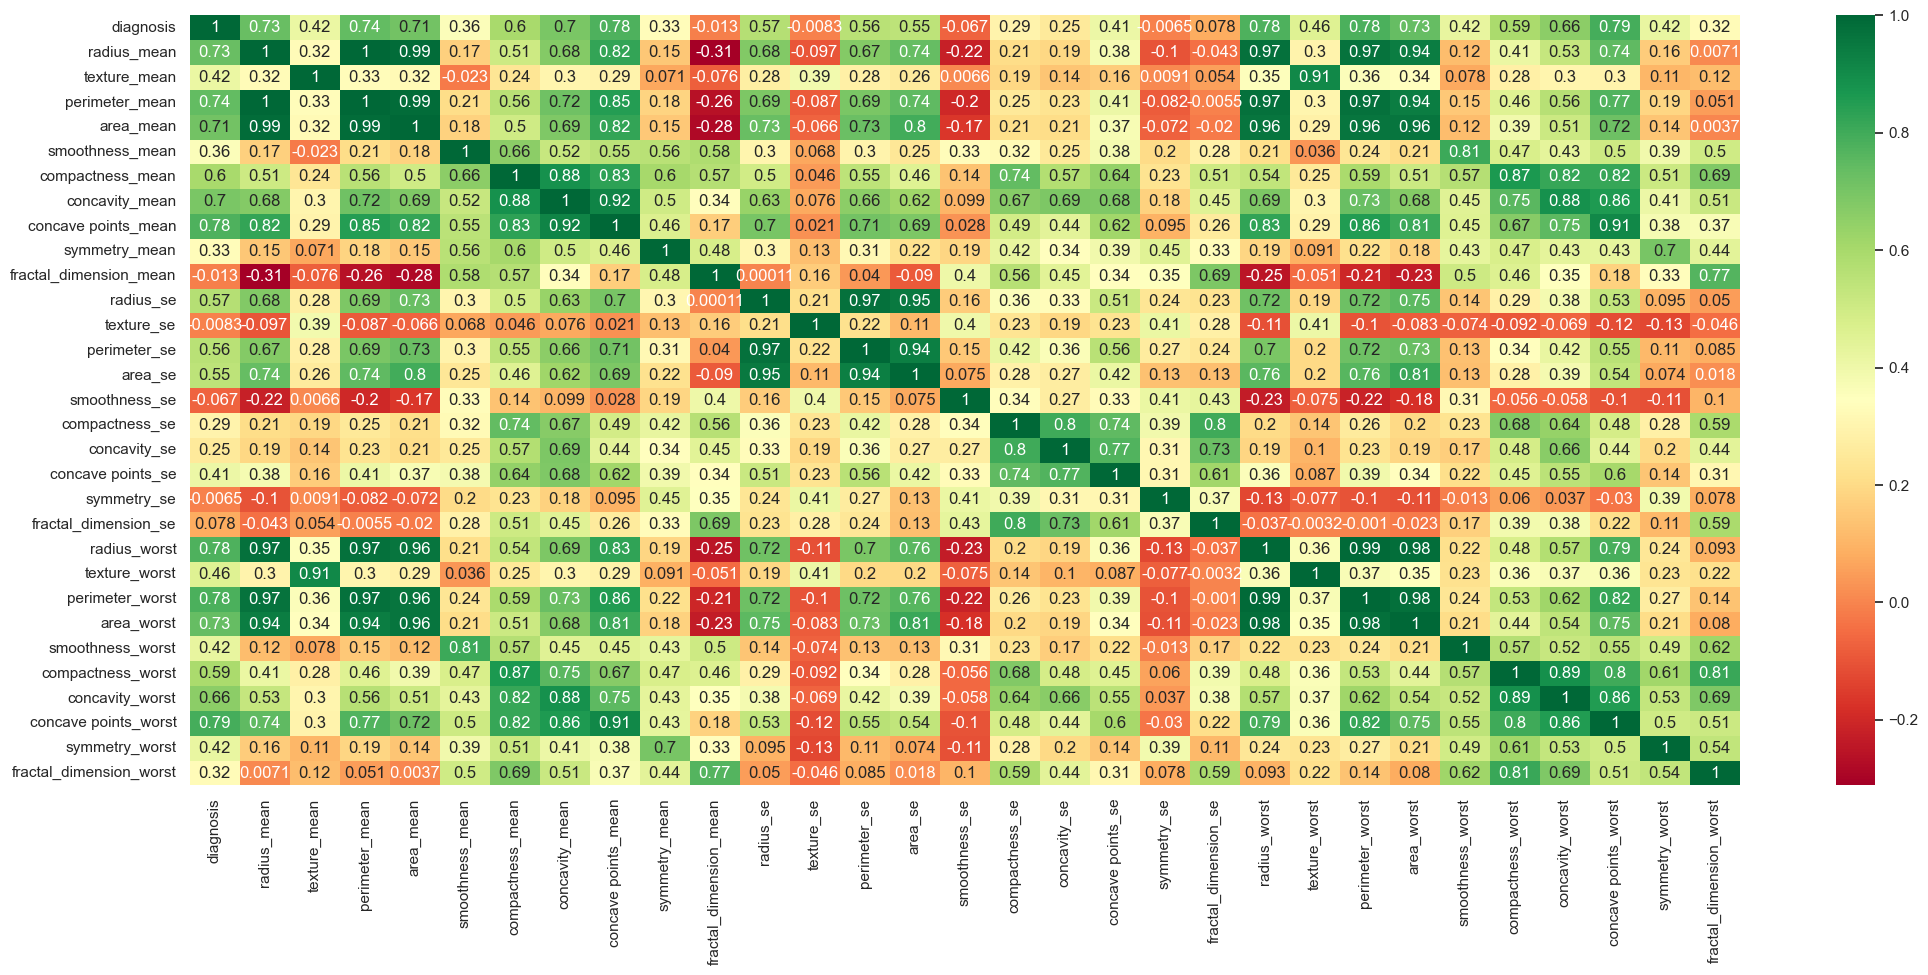

In [14]:
#for each feature, value and occurence
#p = dados_originais.hist(figsize = (20,20))

#check missing data
#import missingno as msno
#p=msno.bar(dados_originais)

## checking the balance of the data by plotting the count of outcomes by their value
#color_wheel = {1: "#0392cf", 2: "#7bc043"}
#p=dados_originais.diagnosis.value_counts().plot(kind="bar")

#pair plot
#sns.pairplot(dados_originais,hue='diagnosis')

#heatmap
plt.figure(figsize=(25,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(dados_originais.corr(), annot=True,cmap ='RdYlGn')  

X, y... TRAIN AND TEST

In [15]:
X = dados_originais.drop(columns="diagnosis",axis=1)
y = dados_originais.diagnosis

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

TESTING MULTIPLES-K TO VERIFY WHICH ONE HAS THE BEST SCORE

In [16]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Max train score 100.0 % and k = [1]
Max test score 94.73684210526315 % and k = [13]


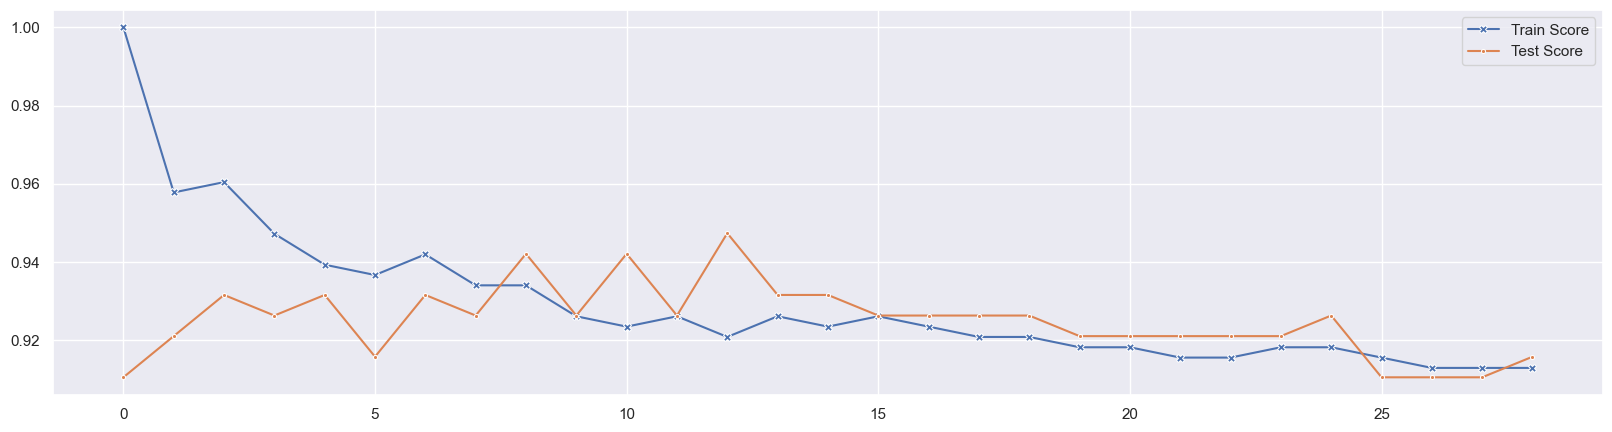

In [17]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

plt.figure(figsize=(20,5))
p = sns.lineplot(train_scores,marker='X',label='Train Score')
p = sns.lineplot(test_scores,marker='.',label='Test Score')

AFTER FIND BEST K, APPLY NEW FIT

In [18]:
#Setup a knn classifier with k neighbors... (K = 13)
knn = KNeighborsClassifier(13)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9473684210526315

EVALUATING MODEL

In [21]:
from sklearn.metrics import confusion_matrix
#get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,118,1,119
1,9,62,71
All,127,63,190


Text(0.5, 20.049999999999997, 'Predicted label')

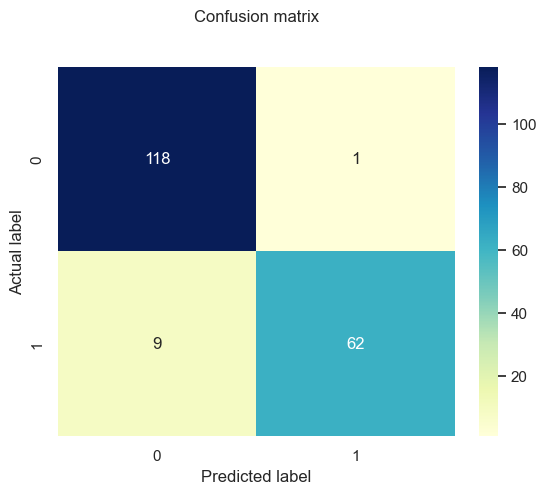

In [11]:
#CONFUSION MATRIX IN GRAPH
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       119
           1       0.98      0.87      0.93        71

    accuracy                           0.95       190
   macro avg       0.96      0.93      0.94       190
weighted avg       0.95      0.95      0.95       190



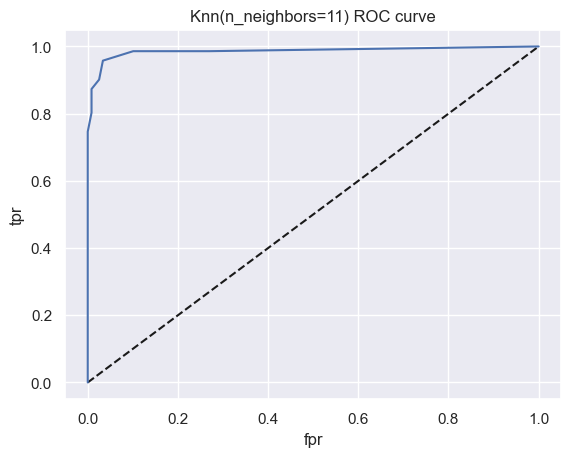

In [25]:
#roc curve
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [26]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.935010091600683
Best Parameters: {'n_neighbors': 14}
